# Exercise - Data Import- Cleaning- Transformation - Visualization

## Netflix has been booming lately and it has become one of the biggest online movies and tv shows streaming platform. This dataset provides crucial insights of the contents provided by Netflix. Let's start exploring and learning together!

![thibault-penin-AWOl7qqsffM-unsplash-scaled.jpg.webp](attachment:thibault-penin-AWOl7qqsffM-unsplash-scaled.jpg.webp)

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

## Get to know the datas

Read Netflix file `netflix_titles.csv`

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__1. Checking the size of the dataset__

In [ ]:
df.shape

(7787, 12)

__2.Check if there is any duplicated records__

In [ ]:
df.duplicated().sum()

0

__3.Look at some basic information of the dataset, and we can see 11 of the datatype are object and 1 is integer.__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


__4.Number of unique data for each column__

In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

__5.Percentage of unique data for each column__

In [ ]:
#df.nunique() / len(df) *100
df.nunique() / df.shape[0]*100

show_id         100.000000
type              0.025684
title           100.000000
director         51.996918
cast             87.723128
country           8.745345
date_added       20.097599
release_year      0.937460
rating            0.179787
duration          2.773854
listed_in         6.318223
description      99.768846
dtype: float64

__6.Checking for missing / null value for each column. Director, cast, country, date_added, rating have missing values__

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

__7.A heatmap showing the missing values__

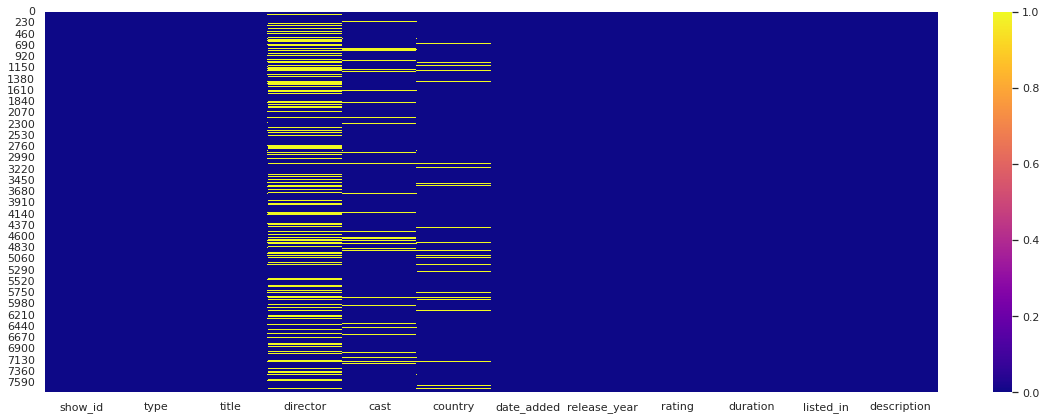

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
sns.heatmap(df.isna(),cmap="plasma")

__8.Check the percentage of missing values for each column.__
- director: This column can be deleted since it has about 30% missing values and about 52% of unique data, hence it does not provide much information for our analysis. However, it will be important for recommender system 
- cast: This column can be deleted too since it has about 9% missing values and about 88% of unique data, hence is also does not provide significant information for analysis. However, it will be important for recommender system 
- country: We replace the missing values with 'United States' since Netflix is originated from United States and most of the movies and TV shows are aired in there. Statistically, looking at the mode of the country column also confirm that 'United States' can be a great replacement for the missing values. 
- date_added:  Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 
- rating: Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 



In [ ]:
df.isnull().sum()/ df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

## Data Preprocessing and Handling Missing Data

__1.Deleting 'director' and 'cast' column__

In [ ]:
df.drop(columns =["director","cast"],inplace = True)
df.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__2.Filling the missing 'country' value with 'United States'__

In [ ]:
df["country"].fillna("United States", inplace = True)
df["country"].isnull().any()

False

__3.Since the 'date_added' data for the missing values are not readily avaialble on the Internet, I choose to drop the missing rows.__

In [ ]:
df.dropna(subset = ["date_added"], inplace = True, axis = 0)
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.rating.head()

0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
Name: rating, dtype: object

In [ ]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

__4.Checking the missing 'rating' movie title and search their 'rating' on Internet__

In [ ]:
df[df.rating.isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


   __5. Replacing the missing 'rating' values which are found from IMDb and Netflix.__

In [ ]:
rating_replacements = {67: 'TV-PG', 2359: 'TV-14', 3660: 'TV-MA', 3736: 'TV-MA', 3737: 'TV-MA', 3738: 'TV-MA', 4323: 'PG-13'}
for index, rating in rating_replacements.items():
  #print(index, rating)
  df.loc[index, "rating"] = rating
df.rating.isnull().sum()

0

In [ ]:
print(df.loc[67])


show_id                                                       s68
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
country                                             United States
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                      TV-PG
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: 67, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   country       7777 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7777 non-null   object
 7   duration      7777 non-null   object
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
dtypes: int64(1), object(9)
memory usage: 926.4+ KB


__6. Adding new features__

- We can add new features from the date_added column which are month and year. Also, we can split the duration column into 'season_count' and 'duration'. 'principal_country' is a column containing the first country listed on 'country' column because some of the content are released by multiple countries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   country       7777 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7777 non-null   object
 7   duration      7777 non-null   object
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
dtypes: int64(1), object(9)
memory usage: 926.4+ KB


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df ['date_added'].dt.year
df['month_added'] =df ['date_added'].dt.month

In [ ]:
df.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
df.date_added.dtype

dtype('<M8[ns]')

In [ ]:
df[df.country.str.len()>10]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
7,s8,Movie,187,United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11
10,s11,Movie,1922,United States,2017-10-20,2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017,10
11,s12,TV Show,1983,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
7781,s7782,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9


In [ ]:
df['duration'].dtype

dtype('O')

In [ ]:
df['season_count'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis = 1 )
df['duration_in_min'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'min' in x['duration'] else '', axis = 1 )
df['principal_country'] = df['country'].apply(lambda x : x.split(',')[0])
df.head(10)


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4,,Brazil
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,,93,Mexico
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,,78,Singapore
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,,80,United States
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,,123,United States
5,s6,TV Show,46,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,,Turkey
6,s7,Movie,122,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,,95,Egypt
7,s8,Movie,187,United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11,,119,United States
8,s9,Movie,706,India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,4,,118,India
9,s10,Movie,1920,India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,12,,143,India


- Adding a new column 'target_ages' based on the content 'rating'.

In [ ]:
from matplotlib.projections.polar import RadialTick
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["target_ages"]=df.rating.replace(ratings_ages)
df.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4,,Brazil,Adults
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,,93,Mexico,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,,78,Singapore,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,,80,United States,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,,123,United States,Teens


## Data Visualization(Exploratory Data Analysis)

__Before we start our exploratory data analysis, we should ask some question we are interested in and use the power of visualization to help us understand and answer our question.__
__Some interesting questions:__
1. Does Netflix contains more TV shows or movies?
2. Which country produce the most content?
3. Is the rate of content addition increasing over the year?
4. Which are the most favoured genre?
5. Does kids prefer TV show or movies?

#### 1. What is the composition of Netflix content?

In [ ]:
pie_x = df["type"].value_counts().reset_index()
pie_x = pie_x.rename(columns={"index": "type", "type": "count"})
pie_x

trace = go.Pie(labels=pie_x['type'], values=pie_x['count'], pull=[0.05])
layout = go.Layout(title="", height=450, legend=dict(x=0.1, y=1))
fig = go.Figure(data = [trace], layout = layout)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- The movies accounts for 69.1% of the content, which is the majority.

#### 2. Is the rate of addition of movie greater than tv shows or vice versa?

In [ ]:
df["type"] == "TV Show"

0        True
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785     True
7786    False
Name: type, Length: 7777, dtype: bool

In [ ]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]
tv_show.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4,,Brazil,Adults
5,s6,TV Show,46,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,,Turkey,Adults
11,s12,TV Show,1983,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,1,,Poland,Adults
12,s13,TV Show,1994,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,1,,Mexico,Adults
16,s17,TV Show,Feb-09,United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1,,United States,Teens


In [ ]:
movie.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,,93,Mexico,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,,78,Singapore,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,,80,United States,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,,123,United States,Teens
6,s7,Movie,122,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,,95,Egypt,Adults


In [ ]:
tv_show_count = tv_show['year_added'].value_counts().reset_index()
tv_show_count

,index,year_added
0,2020,697
1,2019,656
2,2018,430
3,2017,361
4,2016,185
5,2015,30
6,2021,29
7,2014,6
8,2013,5
9,2008,1


In [ ]:
tv_show_count = tv_show_count.rename(columns = {'index' : 'year_added', 'year_added' : 'count'})
tv_show_count

,year_added,count
0,2020,697
1,2019,656
2,2018,430
3,2017,361
4,2016,185
5,2015,30
6,2021,29
7,2014,6
8,2013,5
9,2008,1


In [ ]:
#tv_show_count = tv_show_count.sort_values("count", ascending=False)
tv_show_count = tv_show_count.sort_values("year_added")
tv_show_count

,year_added,count
9,2008,1
8,2013,5
7,2014,6
5,2015,30
4,2016,185
3,2017,361
2,2018,430
1,2019,656
0,2020,697
6,2021,29


In [ ]:
movie_count = movie['year_added'].value_counts().reset_index()
movie_count

,index,year_added
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


In [ ]:

movie_count = movie_count.rename(columns ={'index' : 'year_added', 'year_added' : 'count'})
movie_count

,year_added,count
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


In [ ]:
movie_count = movie_count.sort_values("year_added")
movie_count

,year_added,count
13,2008,1
11,2009,2
12,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,58
4,2016,258
3,2017,864


In [ ]:
df[df["year_added"] == 2021].sort_values("date_added", ascending = False)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
5059,s5060,Movie,Radium Girls,United States,2021-01-16,2018,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,2021,1,,103,United States,Teens
1673,s1674,Movie,Death of Me,"United States, Thailand",2021-01-16,2020,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021,1,,94,United States,Adults
205,s206,Movie,A Monster Calls,"United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021,1,,108,United Kingdom,Teens
1832,s1833,Movie,Double Dad,Brazil,2021-01-15,2020,TV-G,105 min,"Children & Family Movies, Comedies, Dramas","While her mom is away, a teen sneaks out of th...",2021,1,,105,Brazil,Kids
2699,s2700,TV Show,Henry Danger,United States,2021-01-15,2016,TV-G,3 Seasons,"Kids' TV, TV Comedies",A new part-time job forces Henry Hart to balan...,2021,1,3,,United States,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5304,s5305,TV Show,Running Man,United States,2021-01-01,2020,TV-Y7,1 Season,"Kids' TV, TV Comedies","Wanting to bring home the ultimate prize, a gr...",2021,1,1,,United States,Older Kids
3147,s3148,TV Show,Jenni Rivera: Mariposa de Barrio,United States,2021-01-01,2017,TV-MA,1 Season,"Spanish-Language TV Shows, TV Dramas",This drama follows Mexican-American singer Jen...,2021,1,1,,United States,Adults
5520,s5521,Movie,Sex and the City 2,United States,2021-01-01,2010,R,146 min,"Comedies, Dramas, Romantic Movies","Best friends Carrie, Miranda, Samantha and Cha...",2021,1,,146,United States,Adults
5521,s5522,Movie,Sex and the City: The Movie,United States,2021-01-01,2008,R,145 min,"Comedies, Dramas, Romantic Movies",When Carrie's big step forward in her relation...,2021,1,,145,United States,Adults


In [ ]:
trace1 = go.Scatter(x=tv_show_count['year_added'], y=tv_show_count['count'], name="TV Shows")
trace2 = go.Scatter(x=movie_count['year_added'], y=movie_count["count"], name="Movies")
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",xaxis_title='Year',yaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Initially, the rate of addition of TV shows and movies seems to be at the same pace. 
- From 2016 to 2018, a total of 2377 movies have been added while only 976 TV shows have been added
- In 2020, there is a slight increase in the rate of addition of TV shows and a slight reduction in rate of addition of movies which may be a factor of the COVID-19 pandemic.

#### 3. Which month contributes most to content update?

In [ ]:
month_order = [1,2,3,4,5,6,7,8,9,10,11,12][::-1]
month_HM = df.groupby("year_added")["month_added"].value_counts().unstack().fillna(0)[month_order].T
month_HM.head()

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,96.0,118.0,190.0,222.0,175.0,0.0
11,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
10,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0


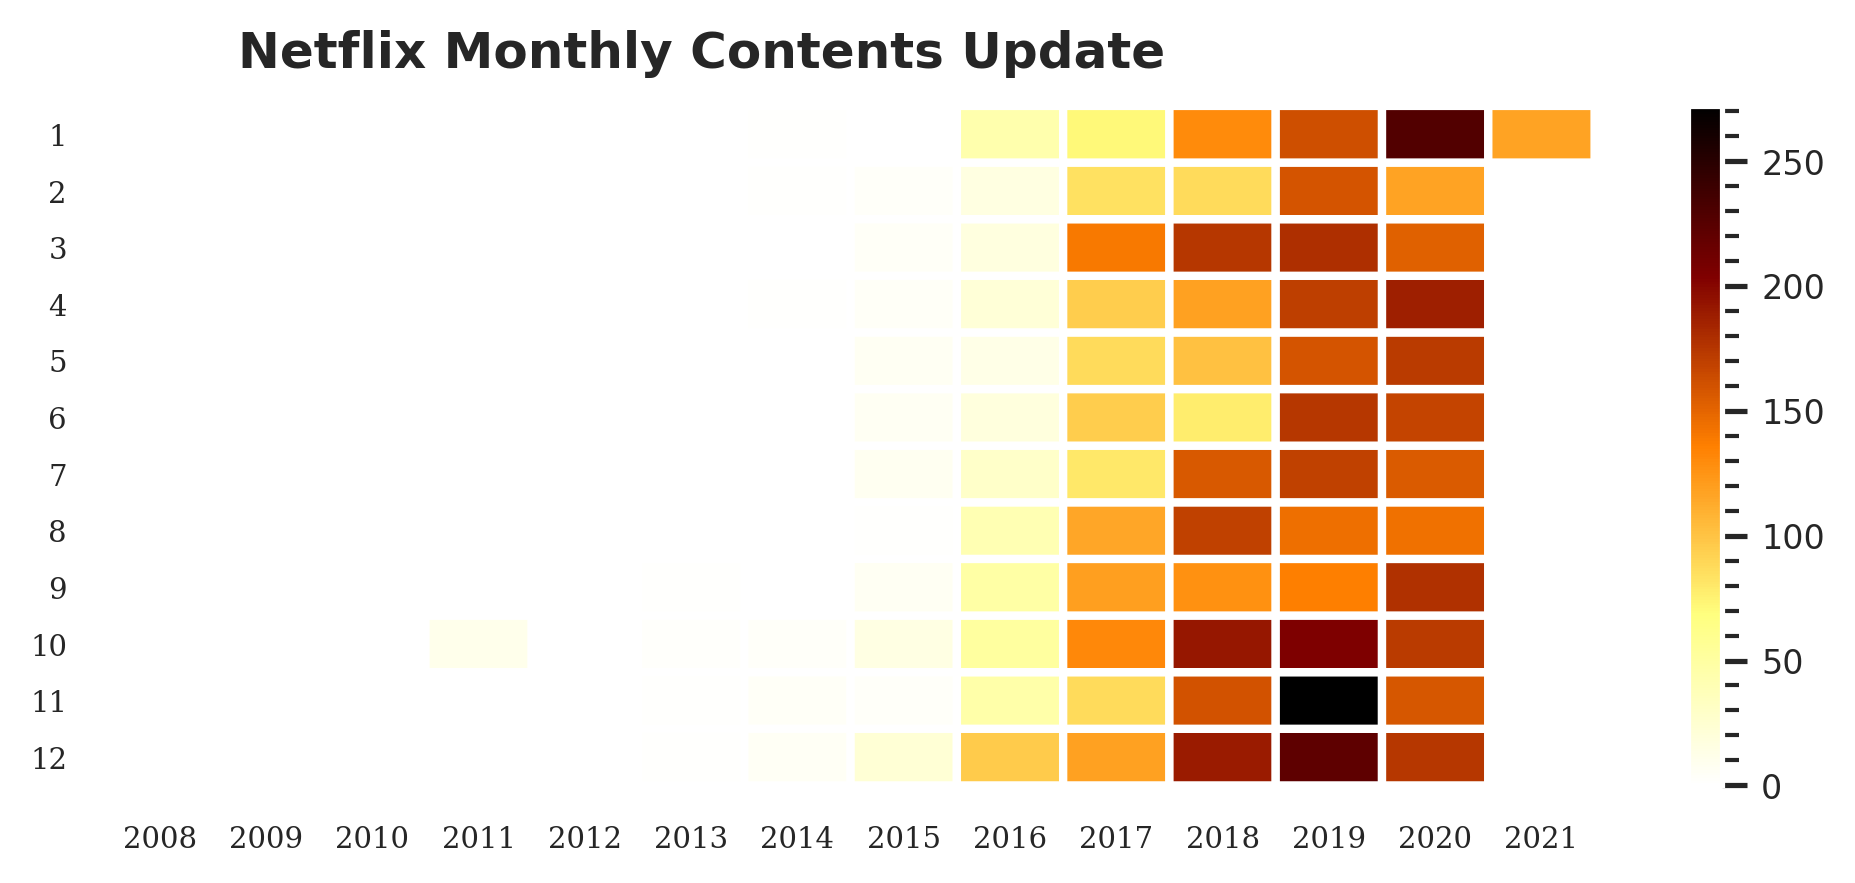

In [ ]:

plt.figure(figsize=(8, 3), dpi=300)
plt.pcolor(month_HM, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(month_HM.columns), 1), month_HM.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_HM.index), 1), month_HM.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Monthly Contents Update', fontsize=12, fontweight='bold', position=(0.40, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()



- This heatmap shows that there are more contents being added during the last few months compare to other months.
- This heatmap might not be the best visualization tool to illustrate the question above but I want to learn to plot more different graphs. A bar chart might better visualize the differences. 

#### 4. Do kids prefer TV shows or movies?

In [ ]:
#Write your function to aggregate
def generate_rating_df(df):
  rating_df= df.groupby(["rating","target_ages"]).agg({"show_id":"count"}).reset_index()
  rating_df= rating_df.rename(columns={"show_id":"counts"})
  rating_df = rating_df.sort_values("target_ages")
  return rating_df

movie_rating_df = generate_rating_df(df[df["type"] == "Movie"])
movie_rating_df


,rating,target_ages,counts
1,NC-17,Adults,3
2,NR,Adults,79
5,R,Adults,663
8,TV-MA,Adults,1848
13,UR,Adults,5
0,G,Kids,39
7,TV-G,Kids,111
10,TV-Y,Kids,117
3,PG,Older Kids,247
9,TV-PG,Older Kids,506


In [ ]:
show_rating_df = generate_rating_df(df[df["type"] == "TV Show"])
show_rating_df

,rating,target_ages,counts
0,NR,Adults,4
1,R,Adults,2
4,TV-MA,Adults,1017
3,TV-G,Kids,83
6,TV-Y,Kids,162
5,TV-PG,Older Kids,299
7,TV-Y7,Older Kids,175
8,TV-Y7-FV,Older Kids,1
2,TV-14,Teens,657


In [ ]:
#Write your code to run aggregate and plot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Ages based rating distribution by type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.20, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

- Movies has about 5.7% more adult content than TV shows.
- TV shows has 30% of content for kids+older kids while movie has only 20%.
- Based on the findings, we can assume that kids prefer TV shows.

#### 5. What does the distribution of rating for TV show and movies look like?

In [ ]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
m1 = {'rating': 'G', 'count': 0}
m2 = {'rating': 'NC-17', 'count': 0}
m3 = {'rating': 'PG', 'count': 0}
m4 = {'rating': 'PG-13', 'count': 0}
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']
movie_rating = movie['rating'].value_counts()[rating_order]
tv_rating = tv_show['rating'].value_counts().reset_index()
movie_rating

G             39
TV-Y         117
TV-G         111
PG           247
TV-Y7         95
TV-Y7-FV       5
TV-PG        506
PG-13        387
TV-14       1272
R            663
NC-17          3
TV-MA       1848
Name: rating, dtype: int64

In [ ]:
tv_rating = tv_rating.rename(columns={'index':'rating', 'rating':'count'})
tv_rating = tv_rating.append(m1,ignore_index = True) 
tv_rating = tv_rating.append(m2,ignore_index = True)
tv_rating = tv_rating.append(m3,ignore_index = True)
tv_rating = tv_rating.append(m4,ignore_index = True)
tv_rating = tv_rating.set_index('rating').T[rating_order]
tv_rating = tv_rating.iloc[0]
tv_rating

rating
G              0
TV-Y         162
TV-G          83
PG             0
TV-Y7        175
TV-Y7-FV       1
TV-PG        299
PG-13          0
TV-14        657
R              2
NC-17          0
TV-MA       1017
Name: count, dtype: int64

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

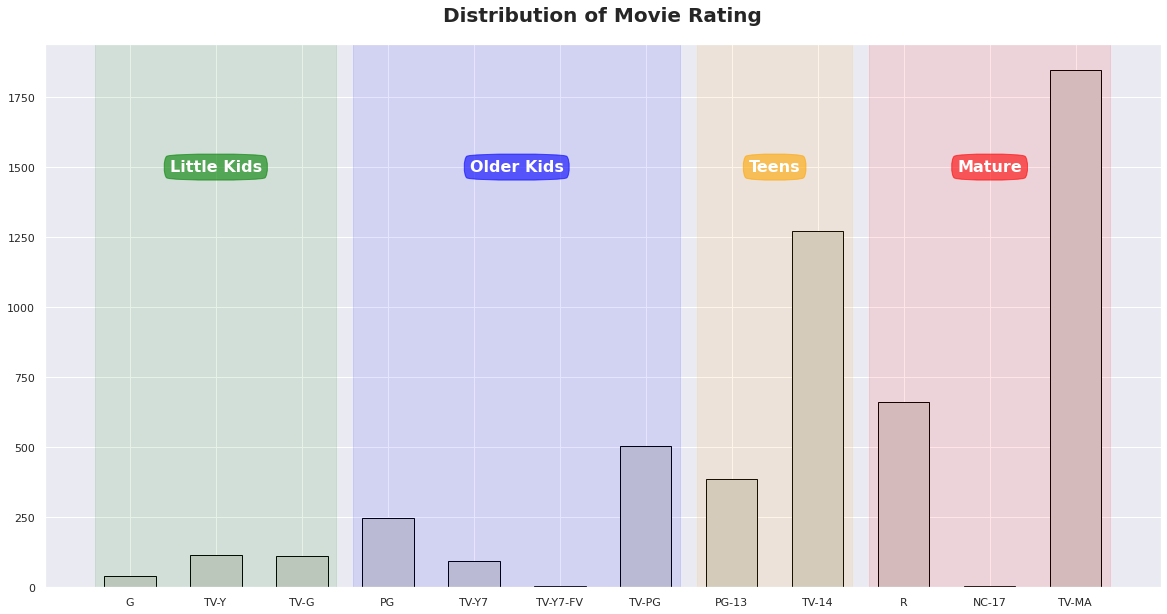

In [ ]:
rating_barplot(movie_rating,'Movie', 1500)

- TV-MA is the most popular rating for Mature movie, and for teens movie, TV-14 has about 3 times more than PG-13 movie.


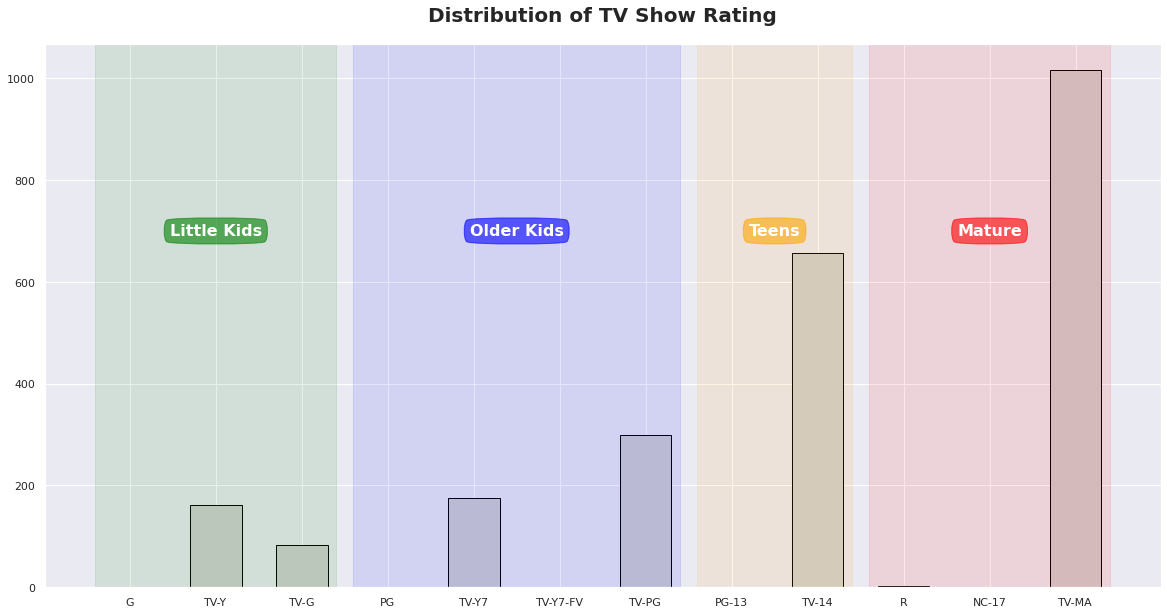

In [ ]:
rating_barplot(tv_rating,'TV Show' , 700)

- For TV show, TV-MA also dominates the Mature content.

#### 6. Which country produces the most content?

In [ ]:
country_df = df["principal_country"].value_counts().reset_index()
country_df = country_df[country_df['principal_country']/country_df["principal_country"].sum()>.01]
country_df.columns = ["country", "count"]
country_df = country_df.sort_values("count")
country_df 

,country,count
15,Brazil,79
14,Taiwan,82
13,China,86
12,Germany,92
11,Egypt,105
10,Turkey,106
9,Australia,107
8,Mexico,123
7,Spain,168
6,South Korea,194


In [ ]:
trace1 = go.Bar(y=country_df['country'], x=country_df['count'], orientation="h", name="")

data = [trace1]
layout = go.Layout(title="Countries with most content",xaxis_title='count', height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- United States, India and United Kingdom is the top 3 countries with the most content.
- As an aspired producer or actor/actress, you might consider this 3 countries for your career.

#### 7. What does the content cumulation over the year look like on a world map?

In [ ]:
country_df2 = df.groupby(["year_added", "principal_country"]).agg({"show_id": "count"}).reset_index()
country_df2['aggregate'] = country_df2.groupby(["principal_country"])["show_id"].cumsum()
country_df2

,year_added,principal_country,show_id,aggregate
0,2008,United States,2,2
1,2009,Denmark,1,1
2,2009,United States,1,3
3,2010,United States,1,4
4,2011,Spain,1,1
...,...,...,...,...
307,2021,South Korea,1,194
308,2021,Spain,1,168
309,2021,Turkey,1,106
310,2021,United Kingdom,6,576


In [ ]:

# year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_df2, locations="principal_country", color="aggregate", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.Plasma
                   )

fig.update_layout(title='Cumulative sum of content over the year by country')
fig.show()

- We can see that the North America, India and Europe dominates the content cumulation over the year.

#### 8. What is the range of movie duration for most of movies?

In [ ]:
df.dtypes

show_id                      object
type                         object
title                        object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                    int64
month_added                   int64
season_count                 object
duration_in_min              object
principal_country            object
target_ages                  object
dtype: object

In [ ]:

x1 = movie['duration_in_min'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], [''], bin_size=0.7, curve_type='normal')
fig.update_layout(title_text='Distplot with Normal Distribution',xaxis_title = 'duration in min', yaxis_title='PDF')
fig.show()

- The duration for movies are distributed normally where the peak are in the range between 90 and 100 minutes.

#### 9. Does TV show usually have more than one season?

In [ ]:
bar_season = tv_show['season_count'].value_counts().reset_index()
bar_season.columns = ['season_count', 'count']
bar_season ['season_count'] = pd.to_numeric(bar_season['season_count'])
bar_season = bar_season.sort_values('season_count')
bar_season
#bar_season = 

,season_count,count
0,1,1608
1,2,378
2,3,183
3,4,86
4,5,57
5,6,30
6,7,19
7,8,18
8,9,8
9,10,5


In [ ]:


trace1 = go.Bar(x=bar_season['season_count'], y=bar_season["count"], name="TV Shows")
data = [trace1]
layout = go.Layout(title="Seasons for TV Show",yaxis_title = 'count',xaxis_title='Number of Seasons', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Most of the TV show consist of 1 season only.

#### 10. What are the favourite genre of movies and TV shows respectively?

In [ ]:
movie

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,,93,Mexico,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,,78,Singapore,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,,80,United States,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,,123,United States,Teens
6,s7,Movie,122,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,,95,Egypt,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,,88,United States,Older Kids
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,,99,Sweden,Adults
7783,s7784,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,,111,India,Teens
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,,44,United States,Adults


In [ ]:
from collections import Counter
col = "listed_in"
categories = ", ".join(movie[col]).split(", ")

counter_list = Counter(categories).most_common(50)
counter_list

labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

In [ ]:

trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre distributions of movies",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- The top 3 favourite genre of movies are:
    1. International movies
    2. Dramas
    3. Comedies
 

- The top 3 favourite TV shows genre are:
    1. International TV Shows
    2. TV Dramas
    3. TV Comedies

#### 11. What are the usual keywords in the movie genre?

In [ ]:
from wordcloud import WordCloud
categories = ", ".join(movie['listed_in']).split(", ")
categories

['Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Dramas',
 'International Movies',
 'Dramas',
 'International Movies',
 'Documentaries',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Documentaries',
 'International Movies',
 'Documentaries',
 'International Movies',
 'Dramas',
 'International Movies',
 'Romantic Movies'

In [ ]:
text = str(categories).replace(',','').replace('[','').replace("''",'').replace(']','')
text

"'Dramas' 'International Movies' 'Horror Movies' 'International Movies' 'Action & Adventure' 'Independent Movies' 'Sci-Fi & Fantasy' 'Dramas' 'Horror Movies' 'International Movies' 'Dramas' 'Horror Movies' 'International Movies' 'Horror Movies' 'International Movies' 'Thrillers' 'Dramas' 'Thrillers' 'Documentaries' 'International Movies' 'Sports Movies' 'Independent Movies' 'Sci-Fi & Fantasy' 'Thrillers' 'Dramas' 'International Movies' 'Thrillers' 'Dramas' 'Thrillers' 'Comedies' 'Dramas' 'Independent Movies' 'Sports Movies' 'Dramas' 'Independent Movies' 'International Movies' 'Action & Adventure' 'Dramas' 'International Movies' 'Dramas' 'International Movies' 'Dramas' 'International Movies' 'Documentaries' 'Horror Movies' 'International Movies' 'Thrillers' 'Documentaries' 'International Movies' 'Documentaries' 'International Movies' 'Dramas' 'International Movies' 'Romantic Movies' 'Dramas' 'International Movies' 'Romantic Movies' 'Comedies' 'Comedies' 'Romantic Movies' 'Documentaries'

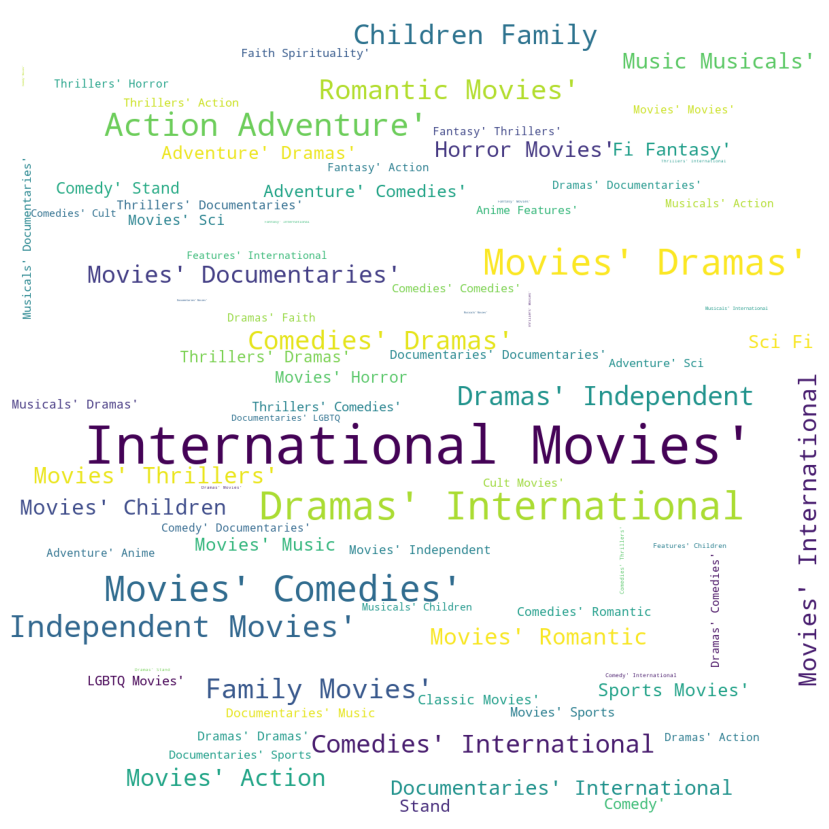

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 12. What are the 20 oldest movies and TV shows on Netflix?

In [ ]:
oldest_movies = movie.sort_values("release_year")[:19]
oldest_movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
4960,s4961,Movie,Prelude to War,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,2017,3,,52,United States,Teens
6117,s6118,Movie,The Battle of Midway,United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017,3,,18,United States,Teens
7616,s7617,Movie,Why We Fight: The Battle of Russia,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,2017,3,,82,United States,Older Kids
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,2017,3,,61,United States,Older Kids
7679,s7680,Movie,WWII: Report from the Aleutians,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017,3,,45,United States,Older Kids
6699,s6700,Movie,The Negro Soldier,United States,2017-03-31,1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...,2017,3,,40,United States,Teens
6657,s6658,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,2017-03-31,1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,2017,3,,40,United States,Older Kids
7268,s7269,Movie,Tunisian Victory,"United States, United Kingdom",2017-03-31,1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,2017,3,,76,United States,Teens
3425,s3426,Movie,Know Your Enemy - Japan,United States,2017-03-31,1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...,2017,3,,63,United States,Teens
5371,s5372,Movie,San Pietro,United States,2017-03-31,1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",2017,3,,32,United States,Teens


In [ ]:
oldest_movies = movie.nsmallest(20,"release_year")
oldest_movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
4960,s4961,Movie,Prelude to War,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,2017,3,,52,United States,Teens
6117,s6118,Movie,The Battle of Midway,United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017,3,,18,United States,Teens
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,2017,3,,61,United States,Older Kids
7616,s7617,Movie,Why We Fight: The Battle of Russia,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,2017,3,,82,United States,Older Kids
7679,s7680,Movie,WWII: Report from the Aleutians,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017,3,,45,United States,Older Kids
6657,s6658,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,2017-03-31,1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,2017,3,,40,United States,Older Kids
6699,s6700,Movie,The Negro Soldier,United States,2017-03-31,1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...,2017,3,,40,United States,Teens
7268,s7269,Movie,Tunisian Victory,"United States, United Kingdom",2017-03-31,1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,2017,3,,76,United States,Teens
3425,s3426,Movie,Know Your Enemy - Japan,United States,2017-03-31,1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...,2017,3,,63,United States,Teens
4436,s4437,Movie,Nazi Concentration Camps,United States,2017-03-31,1945,TV-MA,59 min,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...,2017,3,,59,United States,Adults


In [ ]:
oldest_shows = tv_show.nsmallest(20,"release_year")
oldest_shows

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,United States,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12,1,,United States,Teens
4866,s4867,TV Show,Pioneers of African-American Cinema,United States,2017-02-01,1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...,2017,2,1,,United States,Teens
6953,s6954,TV Show,The Twilight Zone (Original Series),United States,2017-07-01,1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea...",2017,7,4,,United States,Teens
6082,s6083,TV Show,The Andy Griffith Show,United States,2017-07-01,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...,2017,7,8,,United States,Kids
5785,s5786,TV Show,Star Trek,United States,2017-10-01,1968,TV-14,3 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...","Led by unflappable Capt. Kirk, the crew of the...",2017,10,3,,United States,Teens
4216,s4217,TV Show,Monty Python's Fliegender Zirkus,"United Kingdom, West Germany",2018-10-02,1972,TV-MA,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...,2018,10,1,,United Kingdom,Adults
4217,s4218,TV Show,Monty Python's Flying Circus,United Kingdom,2018-10-02,1974,TV-14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...,2018,10,4,,United Kingdom,Teens
1577,s1578,TV Show,Dad's Army,United Kingdom,2018-03-31,1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...,2018,3,10,,United Kingdom,Older Kids
1949,s1950,TV Show,El Chavo,Mexico,2017-12-31,1979,TV-PG,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ...",2017,12,1,,Mexico,Older Kids
4478,s4479,TV Show,Ninja Hattori,Japan,2018-12-23,1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...,2018,12,1,,Japan,Older Kids


#### 13. What is the favourite genre for movie from year 2017 onwards?

In [ ]:
movie['genre'] = movie['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
movie['principal_genre'] = movie['genre'].apply(lambda genres: genres[0])
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies'
]

In [ ]:
year_genre_df = movie[(movie['principal_genre'].isin(top_movies_genres)) & (movie['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count')
fig.show()

- Again, this might not be the best visualization for the question, but I take this as a lesson to learn more visualization tools.

## Thank you for reading my first ever notebook!! Your feedback and upvote is very much appreciated. 

### Here are some notebooks I have referenced for this project(shoutout to the authors), do check them out!
 - https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver/data
 - https://www.kaggle.com/shivamb/netflix-shows-and-movies-exploratory-analysis/notebook
 - https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda#Recommendation-System-(Content-Based)
 - https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly/data